# Scientific Research Project 7 - Practical 2

## Spatial and temporal analysis of the earthquake dataset
In the first week, we downloaded a CSV file of earthquake information from the USGS database and used Python to make some map plots of the dataset. In this notebook, we're going to use some more Python to perform some analysis on the spatial and temporal distribution of earthquakes in the San Francisco region.
****

Firstly, we'll import the packages that we need again. This should be familiar from last time.

In [4]:
# import several helpful packages that we'll use
import numpy as np # linear algebra
import pandas as pd # data processing. We can read in csv files using pd.read_csv('path/to/csv-file')
import matplotlib.pyplot as plt # package for making figures

## Spatial analysis

Last week, we made some plots of how earthquakes were distributed, but we didn't think about how to **quantitatively measure** that distribution. One way of doing this is to do a _cluster analysis_: we will try to identify groups of earthquakes which have a similar spatial location.  One of the most common types of cluster analysis is called `K-means` clustering: this analysis will split the dataset into a user-defined number of clusters, or $K$ clusters (that's why it's called K-means). 

K-means clustering is a type of unsupervised machine learning algorithm. You can read this tutorial for details about how K-means clustering works: https://stanford.edu/~cpiech/cs221/handouts/kmeans.html
You can also look at the Python user guide for K-means which provides a lot of information: https://scikit-learn.org/stable/modules/clustering.html#k-means

The good thing about this algorithm is that it's very simple and easy to understand. However, one of the downsides is that we have to decide the number of clusters, or groups, that we want to end up with in advance. The result will be dependent on the number of clusters, or value of $K$, that you choose. Here we start with clustering into 5 groups ($K = 5$) but you should experiment and find a value of $K$ that looks appropriate for your dataset. We will start by importing the K-means package:


In [3]:
# import K means clustering package from scikit-learn: https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html
from sklearn.cluster import KMeans


Now we have to load our earthquake data into Google Colab. This is the exact same as we did last week using the USGS CSV file that you downloaded. To do this, click the small folder icon on the left hand bar and then click `Upload to Session Storage`. You can then navigate to the CSV file we downloaded and add it to Google Colab.

**NOTE** - you will have to re-upload the data to Google Colab whenever you want to run this notebook. 

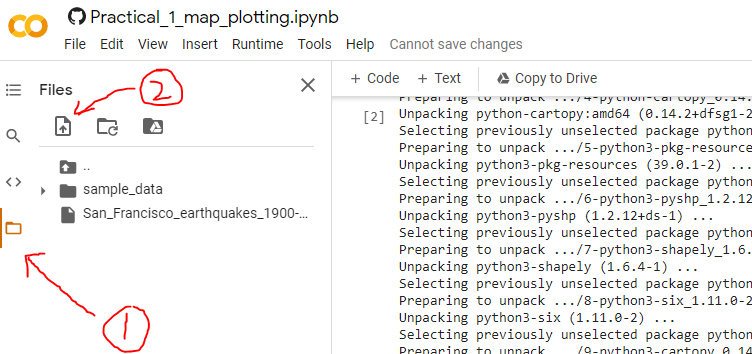

Once you have uploaded the file and you can see it in the left hand bar, we can then load it into Python again using the code in the cell below.

In [5]:
df = pd.read_csv('San_Francisco_earthquakes_1900-2020.csv') # This needs to correspond to the name of the file you uploaded. You can change it to represent your own file 

Now that we've got our dataframe, let's run the K-means clustering algorithm. We'll define a variable $K=5$ which sets the number of clusters that we want.

In [23]:
# set K = number of clusters you want
K = 5

The next step is to get the X and Y values for clustering from our data. In our case, the X value is the longitude and the Y value is the latitude. We then run the clustering on the data.

In [29]:
# get the longitude and latitude
data = df[['longitude', 'latitude']]
# run the K-means clustering on the data with K number of clusters
kmeans = KMeans(n_clusters=K)
clusters = kmeans.fit_predict(data)

The `clusters` variable is now a list of the cluster number that was assigned to each earthquake. Python always starts counting at 0, so we have 5 clusters: cluster 0, cluster 1, cluster 2, cluster 3, and cluster 4:

In [30]:
clusters

array([1, 1, 3, 1, 1, 0, 3, 0, 1, 3, 3, 3, 1, 0, 1, 3, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 2, 2, 2, 2, 2, 0, 0, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 2, 1, 3, 3, 3, 0, 0, 2, 0, 1, 0, 1,
       1, 1, 1, 1, 0, 2, 1, 1, 2, 1, 2, 0, 2, 0, 1, 1, 1, 1, 0, 1, 0, 1,
       1, 0, 1, 2, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 4, 2, 1, 1, 1, 0, 2,
       0, 0, 0, 1, 1, 1, 1, 0, 0, 2, 0, 0, 0, 0, 1, 0, 1, 1, 0, 3, 0, 0,
       1, 2, 0, 0, 0, 0, 1, 1, 0, 1, 2, 1, 2, 3, 0, 0, 2, 1], dtype=int32)

We can now make a simple scatter plot of the earthquakes coloured by the cluster number.

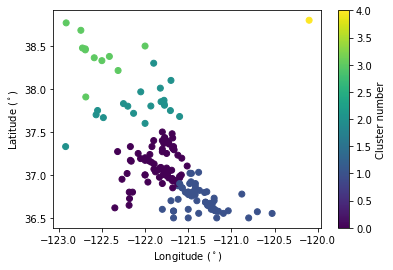

In [38]:
# make a simple X and Y plot with the points coloured by the cluster number
cbar = plt.scatter(data['longitude'], data['latitude'], c=clusters)
plt.xlabel('Longitude ($^\circ$)')
plt.ylabel('Latitude ($^\circ$)')
# add a colour bar
plt.colorbar(cbar, label='Cluster number')

We can add the cluster number back in to our original dataframe, and then use pandas to save it as a new CSV file:

In [62]:
df['cluster_number'] = clusters
df.to_csv('San_Francisco_earthquakes_plus_clustering.csv', index=False)

### Testing if points are randomly distributed
Another test, which might be more useful, would be to check whether the earthquakes are randomly distributed, often called _Complete Spatial Randomness (CSR)_, or whether they are clustered into groups. To do that, we will install and import some libraries[link text](https://) for analysing point patterns:

In [49]:
# download and install the point pattern library
!pip install libpysal pointpats
import libpysal as ps
from pointpats import PointPattern
import pointpats.quadrat_statistics as qs

In [50]:
# make a point pattern from the latitude and longitude and print the summary
pp = PointPattern(data)
pp.summary()

Point Pattern
172 points
Bounding rectangle [(-122.92,36.5), (-120.1,38.8)]
Area of window: 6.486000000000047
Intensity estimate for window: 26.518655565833914
            x          y
0 -121.274000  36.645500
1 -121.244333  36.630500
2 -122.312333  38.215167
3 -121.180833  36.584333
4 -121.496333  36.771167


To test whether points in the pattern are randomly distributed, we will use what's called a _Quadrat Statistic_. This comes from ecology, where a common way of counting the distribution of, say, beetles or plants, is by dividing an area up in to rectangles and counting the number of organisms in each rectangle. If the organisms are randomly distributed, then there should be an even number of them in each rectangle. You can see more explanation in this document: https://www.seas.upenn.edu/~ese502/NOTEBOOK/Part_I/3_Testing_Spatial_Randomness.pdf

Here we will set up our quadrats to be rectangle shapes with 3 rows (`ny`)and 3 columns (`nx`). One disadvantage of this method is that it can be sensitive to the number of rectangles that you choose. You can test the sensitivity by changing `nx` and `ny` in the function below. 

In [59]:
q_r = qs.QStatistic(pp,shape= "rectangle",nx = 3, ny = 3)

We can plot the quadrats, which will show you how many earthquakes are located in each one. Just from looking at the numbers, we can see that there is a very uneven distribution of earthquakes across the region.

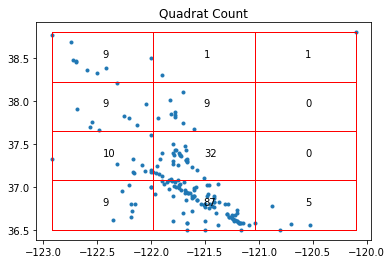

In [58]:
q_r.plot()

But how can we say that statistically? The easiest way to test the CSR hypothesis is to use the Pearson $\chi^2$ goodness-of-fit test. This works by comparing the _expected_ number of points in each rectangle if the dataset was random, to the _actual_ number of points in each rectangle that we observe.
You can read this notebook for a very nice explanation of how this works (focus on Section 3.1): https://joparga3.github.io/spatial_point_pattern/

Our null hypothesis, that the points are randomly distributed, would occur if we have a $\chi^2$ statistic with a $p$-value greater than 0.05. If $p > 0.05$ it means we can't reject the null hypothesis at a 95% confidence level.

Our alternative hypothesis, that the points are clustered, would occur if $p < 0.05$. So let's look at our results:


In [54]:
q_r.chi2 

407.9767441860466

In [56]:
q_r.chi2_pvalue

3.681655621499739e-83

We can see that we have a $p$ value _much_ smaller than 0.05! This means we can reject the null hypothesis and state that the earthquakes are not randomly located.

### Exercise 1: Spatial analysis
In this section, we've explored a couple of statistical techniques that you could use to analyse the spatial distribution of earthquakes. Try the following:

1. Re-run the K-means clustering with different numbers of clusters (change the value of $K$. How does this affect the results?
2. Think about what the clusters tell you. Does the machine learning algorithm relate to the tectonic setting around San Francisco?
3. Practice your Python by modifying the scatter plot of earthquakes coloured by cluster number. Can you work out how to save this plot as an image? (HINT: see notebook from last week for example of how to do this).

4. The quadrat method for testing whether points are randomly located can be dependent on the number and size of rectangles that are used. Try varying the number of rectangles, and look at the difference in the $\chi^2$ statistic and $p$ value. Does it have a significant impact on our hypothesis testing? If it does, this would be quite worrying, as it means our statistic wouldn't be very reliable.

**BONUS QUESTION** for those who want to mess around with Python more:

5. At the end of the K-means clustering, we saved the output to a new CSV file. In a new cell, try to read this to a dataframe using pandas. Then use the code from the first notebook to make a `cartopy` map plot of the earthquakes coloured by cluster number. (HINT - modify the last code block in Practical 1).